In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

---

# **Constant**

In [3]:
a = tf.constant(2, name = "a")
b = tf.constant(3, name = 'b')
x = tf.add(a,b, name="add")
with tf.Session(config=config) as sess:
    print(sess.run(x))

5


- 마지막 숫자 값을 반복해 설정된 shape을 생성

In [4]:
a = tf.constant(2, shape = [2,2], verify_shape = False)
a

<tf.Tensor 'Const:0' shape=(2, 2) dtype=int32>

In [5]:
with tf.Session(config=config) as sess:
    _a = sess.run(a)
_a

array([[2, 2],
       [2, 2]], dtype=int32)

- 다른 방식으로 sess.run 하는 방법

In [6]:
# default session()
tf.InteractiveSession(config=config)
# run
a.eval()

array([[2, 2],
       [2, 2]], dtype=int32)

- 마지막 숫자 값을 반복해 설정된 shape을 생성

In [7]:
b = tf.constant([2,1], shape=[3,3])
b.eval()

array([[2, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)

- **broadcast examples**

In [8]:
a = tf.constant([2,2], name= "a")
b = tf.constant([[0,1],[2,3]], name="b")
x = tf.add(a,b, name = "add")

In [9]:
x.eval()

array([[2, 3],
       [4, 5]], dtype=int32)

In [10]:
y = tf.multiply(a,b, name ='mul')
y.eval()

array([[0, 2],
       [4, 6]], dtype=int32)

---

# **특정한 값으로 Tensor를 채우는 방법***

- zeros

In [11]:
z = tf.zeros([2,3], dtype=tf.int32, name = 'inital_value')
z.eval()

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [12]:
input_tensor = [[0,1],[2,3],[4,5]]
input_tensor

[[0, 1], [2, 3], [4, 5]]

In [13]:
z_like = tf.zeros_like(input_tensor)
z_like.eval()

array([[0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

- ones

In [14]:
one = tf.ones([2,3], dtype=tf.int32, name = 'inital_value')
one.eval()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [15]:
one_like = tf.ones_like(input_tensor)
one_like.eval()

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)

- a specific value

In [16]:
fill = tf.fill([2,3], 8)
fill.eval()

array([[8, 8, 8],
       [8, 8, 8]], dtype=int32)

---

# **Contants as Sequences**

In [17]:
# only float
linsp = tf.linspace(start=10.0, stop=13.0, num=4)
linsp.eval()

array([10., 11., 12., 13.], dtype=float32)

In [18]:
ran1 = tf.range(start=3, limit=18, delta=3)
ran1.eval()

array([ 3,  6,  9, 12, 15], dtype=int32)

In [19]:
# tf.range is not iterable
ran2 = tf.range(start=0, limit=5)
ran2.eval()

array([0, 1, 2, 3, 4], dtype=int32)

In [20]:
# outputs from graph are iterable
[ i for i in ran2.eval()]

[0, 1, 2, 3, 4]

___

# **Randomly Generated Constants***

<p align="center"><img width="500" height="auto" src="./picture/normal_dis.png"></p>

In [21]:
norm = tf.random_normal([3,3], mean=0.0, stddev=1.0, dtype=tf.float32)
norm.eval()

array([[ 0.01461793, -1.6150188 ,  1.4873881 ],
       [ 0.07068097, -0.6912661 ,  0.19011493],
       [ 0.41648027, -1.1468351 , -1.1730275 ]], dtype=float32)

<p align="center"><img width="500" height="auto" src="./picture/t_normal_d.png"></p>

In [22]:
t_norm = tf.truncated_normal([3,3], mean=0.0, stddev=1.0, dtype=tf.float32)
t_norm.eval()

array([[ 0.62541044, -0.6920324 , -0.63228077],
       [-1.3719941 , -0.82131743, -1.7461069 ],
       [ 0.98285645, -1.7571507 ,  0.24591823]], dtype=float32)

- batch단위로 update할 때 diversity를 가지는 방법

In [23]:
a = tf.constant([[2,1],[2,2],[3,3]])
suffle = tf.random_shuffle(a)

In [24]:
suffle.eval()

array([[2, 1],
       [3, 3],
       [2, 2]], dtype=int32)

- multinomial distribution

In [25]:
b = tf.constant(np.random.normal(size=(3,4)))
b.eval()

array([[ 0.81318066,  0.99771944,  1.0133489 ,  0.41025099],
       [-1.11684745,  0.22301195, -0.35553633, -0.17773813],
       [-0.34038863,  1.00654491,  0.19369768,  0.16498733]])

In [26]:
# b is an probability over distribution
# n is number of samples
tf.multinomial(logits= b, num_samples=10).eval()

array([[0, 1, 2, 2, 1, 3, 1, 0, 1, 2],
       [3, 1, 3, 3, 2, 2, 2, 1, 1, 3],
       [1, 2, 0, 2, 1, 2, 3, 1, 3, 1]])

- gamma distribution

In [27]:
size = (50000,)
shape_parameter = 1.5
scale_parameter = 0.5
bins = np.linspace(-1, 5, 30)

<p align="center"><img width="400" height="auto" src="./picture/Gamma-distribution-The-two-parameter-gamma-distribution-is-specified-in-terms-of-a-shape.png"></p>

In [28]:
tf_ran = tf.random_gamma(shape=size, alpha=shape_parameter, beta=1/scale_parameter).eval()
tf_ran

array([0.46443126, 1.6910329 , 1.0002396 , ..., 0.55353063, 0.9440237 ,
       0.56810814], dtype=float32)

In [29]:
np_ran = np.random.gamma(size=size, shape=shape_parameter, scale = scale_parameter )
np_ran

array([0.38838336, 0.12790209, 0.32373217, ..., 0.11283486, 0.26853574,
       0.85622306])

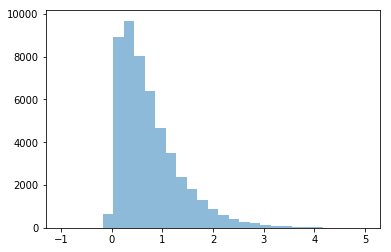

In [30]:
# alpha: range of bins
plt.hist(tf_ran, bins=bins, alpha=0.5);

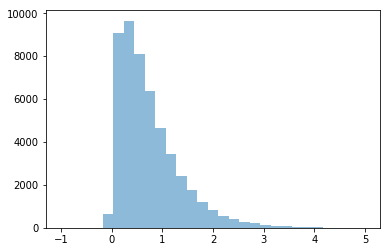

In [31]:
# alpha: range of bins
plt.hist(np_ran, bins=bins, alpha=0.5);

- **Seed 설정**
    - op object에 대한 seed 설정하는 방법
    - session 단위로 seed 설정하는 방법
        - weight initializaion할 때 설정된 seed값에 따라 동일한 값을 부여 할 수 있음*

In [32]:
ran1 = tf.random_gamma(shape=size, alpha=shape_parameter, beta=1/scale_parameter, seed=1)
ran2 = tf.random_gamma(shape=size, alpha=shape_parameter, beta=1/scale_parameter)

with tf.Session(config=config) as sess:
    print(sess.run(ran1))
    print(sess.run(ran2))
with tf.Session(config=config) as sess:
    print(sess.run(ran1))
    print(sess.run(ran2))

[0.41270632 0.2803034  0.26234    ... 0.23223135 0.41961455 0.6411132 ]
[1.0389929  0.02831226 0.6094381  ... 0.40110907 1.340842   0.02228698]
[0.41270632 0.2803034  0.26234    ... 0.23223135 0.41961455 0.6411132 ]
[1.0122739  1.030091   0.09850701 ... 0.46997434 0.4186724  0.4976452 ]


In [33]:
tf.set_random_seed(1)
tf_ran1 = tf.random_gamma(shape=size, alpha=shape_parameter, beta=1/scale_parameter)
tf_ran2 = tf.random_gamma(shape=size, alpha=shape_parameter, beta=1/scale_parameter)

with tf.Session(config=config) as sess:
    print(sess.run(tf_ran1))
    print(sess.run(tf_ran2))
with tf.Session(config=config) as sess:
    print(sess.run(tf_ran1))
    print(sess.run(tf_ran2))

[0.19526242 1.0317712  1.3083752  ... 0.9441139  0.3063968  0.4665212 ]
[0.7920905  0.13498338 0.29563674 ... 0.40388352 0.5188166  0.3100317 ]
[0.19526242 1.0317712  1.3083752  ... 0.9441139  0.3063968  0.4665212 ]
[0.7920905  0.13498338 0.29563674 ... 0.40388352 0.5188166  0.3100317 ]


---

# **Operation***

In [34]:
a = tf.constant([3,6])
b = tf.constant([2,2])

In [35]:
tf.add(a,b).eval()

array([5, 8], dtype=int32)

- add multiple elements 

In [36]:
# list as input
tf.add_n([a,b,b]).eval()

array([ 7, 10], dtype=int32)

- elemnt-wise multiply

In [37]:
tf.multiply(a,b).eval()

array([ 6, 12], dtype=int32)

- matrix multiplication*
    - shape 변환*

In [38]:
print(a)

#case 1)
print(tf.reshape(a,shape=[1,2]))

#case 2)
print(tf.reshape(a,shape=[1,-1]))

# print
print(tf.reshape(a,shape=[1,2]).eval())

Tensor("Const_4:0", shape=(2,), dtype=int32)
Tensor("Reshape:0", shape=(1, 2), dtype=int32)
Tensor("Reshape_1:0", shape=(1, 2), dtype=int32)
[[3 6]]


In [39]:
# (1x2) x (2x1)
mat = tf.matmul(tf.reshape(a,[1,2]),tf.reshape(b,[2,1]))
print(mat)
print(mat.eval())

Tensor("MatMul:0", shape=(1, 1), dtype=int32)
[[18]]


- division

In [40]:
tf.div(a,b).eval()

array([1, 3], dtype=int32)

- mod(remainder)

In [41]:
tf.mod(a,b).eval()

array([1, 0], dtype=int32)

---

# **Tensorflow Data Types**

- 0-d tensor (scalar)

In [42]:
t_0 = 19
print(tf.zeros_like(t_0).eval())
print(tf.ones_like(t_0).eval())

0
1


- 1-d tensor (vector)

In [43]:
t_1 = ['apple', 'peach', 'banana']

# string dosen't work

# print(tf.zeros_like(t_1).eval())
# print(tf.ones_like(t_1).eval())

 - 2-d tensor (matrix)

In [44]:
t_2 = [[True, False, False],
      [False, False, True],
      [False, True, False]]
print(tf.zeros_like(t_2).eval())
print(tf.ones_like(t_2).eval())

[[False False False]
 [False False False]
 [False False False]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


- **dtypes lists**

<p align="center"><img width="400" height="auto" src="./picture/dtype.jpg"></p>

- **Tensorflow vs Numpy**

In [45]:
tf.int32 == np.int32

True

In [46]:
tf.ones([2,2], np.float32).eval()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [47]:
tf.ones([2,2], tf.float32).eval()

array([[1., 1.],
       [1., 1.]], dtype=float32)

---

# **tf.Variable**

- **Variable를 사용해야하는 이유***
    - 메모리를 많이 요구하는 데이터에 대해서 사용하기 효율적임

In [48]:
# remove previous graph
tf.reset_default_graph()

my_const = tf.constant([1.0, 2.0], name = 'my_const')

my_const

<tf.Tensor 'my_const:0' shape=(2,) dtype=float32>

In [49]:
# requires more memory
with tf.Session(config=config) as sess:
    # serialized version of graph
    print(sess.graph.as_graph_def())

node {
  name: "my_const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\200?\000\000\000@"
      }
    }
  }
}
versions {
  producer: 24
}



- **다양한 함수를 이용하여 Variable를 컨트롤 할 수 있음**
    - initializer
    - value
    - assign
    - assign_add

- **Variable**
    - 한번 선언된 변수를 같은 이름으로 선언할 경우 이름에 숫자가 붙어 생성됨

In [50]:
tf.reset_default_graph()

# empty values
a = tf.Variable(2, name = "scalar")
b = tf.Variable(2, name = "scalar")

print(a)
print(b)

<tf.Variable 'scalar:0' shape=() dtype=int32_ref>
<tf.Variable 'scalar_1:0' shape=() dtype=int32_ref>


- **get_variable** (주로 사용되는 방식)
    - 효율적인 변수관리가 가능
    - 한번 선언된 변수를 같은 이름으로 선언할 수 없음(reset이 필요함)

In [51]:
tf.reset_default_graph()

# empty values
a = tf.get_variable(name= "scalar", initializer=tf.constant(2))
b = tf.get_variable(name= "vector", initializer=tf.constant([2,3]))
c = tf.get_variable(name= "matrix", initializer=tf.constant([[0,1],[2,3]]))
W = tf.get_variable(name= "big_matrix", shape = [784,10], initializer=tf.zeros_initializer()) # tf.initializers.truncated_normal()

In [52]:
print('[1]',a,'\n') 
print('[2]',b,'\n') 
print('[3]',c,'\n') 
print('[4]',W,'\n') 

[1] <tf.Variable 'scalar:0' shape=() dtype=int32_ref> 

[2] <tf.Variable 'vector:0' shape=(2,) dtype=int32_ref> 

[3] <tf.Variable 'matrix:0' shape=(2, 2) dtype=int32_ref> 

[4] <tf.Variable 'big_matrix:0' shape=(784, 10) dtype=float32_ref> 



- **initialization을 해주어야 Variable에 값이 할당 됨***
    - global initialization*
    - local initialization (Transfer learning: 특정 layer만 initialization하고 싶을 때 사용 가능)*
    - single initialization


In [53]:
# global initialization
init = tf.global_variables_initializer()
with tf.Session(config=config) as sess:
    sess.run(init)
    print(sess.run(a))
    print(sess.run(b))
    print(sess.run(c))
    print(sess.run(W))

2
[2 3]
[[0 1]
 [2 3]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
# local initialization
init = tf.variables_initializer([a,b],name='init_ab')
with tf.Session(config=config) as sess:
    sess.run(init)
    print(sess.run(a))
    print(sess.run(b))

2
[2 3]


In [55]:
# single initialization
with tf.Session(config=config) as sess:
    sess.run(W.initializer)
    print(sess.run(W))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- **tf.assign**
    - 기존에 있는 Variable에 특정한 값을 할당하고 싶을 때 사용
    - assign op를 적용할려면 해당 object가 수행되어야 함
    - initializer 대신에 assign 함수를 대체해서 사용할 수 있음 **(initializer op == assign op)**

In [56]:
# dosen't assign
tf.reset_default_graph()

W = tf.get_variable(name = 'assign_example', initializer=tf.constant(10))
W.assign(100)

with tf.Session(config=config) as sess:
    sess.run(W.initializer)
    print(sess.run(W))

10


In [57]:
# assign
tf.reset_default_graph()

W = tf.get_variable(name = 'assign_example', initializer=tf.constant(10))

# W에 100을 할당; assign_op에 100을 할당하는 것이 아님
assign_op = W.assign(100)

# case1)
with tf.Session(config=config) as sess:
    sess.run(W.initializer)
    sess.run(assign_op)
    print(sess.run(W))
    
# case2)    
with tf.Session(config=config) as sess:
    sess.run(assign_op)
    print(sess.run(W))

100
100


In [58]:
# op dependency
tf.reset_default_graph()

W = tf.get_variable(name = 'assign_example', initializer=tf.constant(10))
assign_op = W.assign(100)
op = tf.add(assign_op,3) 

with tf.Session(config=config) as sess:
    sess.run(W.initializer)
    print(sess.run(op))

103


- Session이 켜져 있을 경우, assign된 값이 계속 사용됨

In [59]:
tf.reset_default_graph()

my_var = tf.get_variable(name = 'my_var', initializer=tf.constant(2))
my_var_times_two = my_var.assign(2*my_var) # mutiply

with tf.Session(config=config) as sess:
    sess.run(my_var.initializer)
    print(sess.run(my_var))
    print(sess.run(my_var_times_two))
    print(sess.run(my_var))
    print(sess.run(my_var_times_two))
    print('\n')
    
with tf.Session(config=config) as sess:
    sess.run(my_var.initializer)
    print(sess.run(my_var))
    print(sess.run(my_var_times_two))
    print(sess.run(my_var))
    print(sess.run(my_var_times_two))
    

2
4
4
8


2
4
4
8


In [60]:
tf.reset_default_graph()

my_var = tf.get_variable(name = 'my_var', initializer=tf.constant(10))

with tf.Session(config=config) as sess:

    sess.run(my_var.initializer)
    print(sess.run(my_var))
    print(sess.run(my_var.assign_add(10)))
    print(sess.run(my_var.assign_sub(2)))


10
20
18


- 선언된 session들은 독립적으로 수행됨

In [61]:
tf.reset_default_graph()

my_var = tf.get_variable(name = 'my_var', initializer=tf.constant(10))

sess1 = tf.Session(config=config)
sess2 = tf.Session(config=config)

sess1.run(my_var.initializer)
sess2.run(my_var.initializer)
    
print(sess1.run(my_var.assign_add(10)))
print(sess2.run(my_var.assign_sub(2)))
print('\n')

print(sess1.run(my_var.assign_add(10)))
print(sess2.run(my_var.assign_sub(2)))

sess1.close()
sess2.close()

20
8


30
6


- variable로 선언된 값을 재사용할 경우 원래 값이 변할 수 있음 (error)
- copy() in numpy

In [62]:
# not safe case
tf.reset_default_graph()

W = tf.get_variable(name = 'W',shape =[], initializer = tf.truncated_normal_initializer())
U = tf.get_variable(name = 'U', initializer = 2*W)

In [63]:
# safe
tf.reset_default_graph()

W = tf.get_variable(name = 'W',shape =[], initializer = tf.truncated_normal_initializer())
U = tf.get_variable(name = 'U', initializer = 2*W.initialized_value())

In [64]:
sess = tf.InteractiveSession(config=config)

In [65]:
sess.run(U.initializer)
U.eval()

-1.9076931

- **Control Dependencies***
    - graph가 a, b, c, d, e의 op를 가질 때,
    - tf.control_dependencies([a,b,c])를 적용할 경우
    - 'a', 'b', 'c'가 먼저 수행된 후에 d, e가 실행되도록 컨트롤(Transfer learning, Batch normalization에 주로 사용됨)

In [66]:
tf.reset_default_graph()

a = tf.get_variable(name = 'a', initializer=2.0)
b = tf.get_variable(name = 'b', initializer=1.0)

dependent_op = tf.assign(b, a*3) # b <- a*3

c = a + 1

In [67]:
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(b))
    print(sess.run(c))
    print(sess.run(b))

1.0
3.0
1.0


In [68]:
tf.reset_default_graph()

a = tf.get_variable(name = 'a', initializer=2.0)
b = tf.get_variable(name = 'b', initializer=1.0)

dependent_op = tf.assign(b, a*3) # b <- a*3

with tf.control_dependencies([dependent_op]):
    c = a + 1

In [69]:
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(b))
    print(sess.run(c))
    print(sess.run(b))

1.0
3.0
6.0


---

# **Placeholder***
- 데이터를 subset형태(batch)로 학습하고 싶을 때 선언하는 변수

In [70]:
tf.reset_default_graph()

a = tf.placeholder(tf.float32, shape = [3,])
b = tf.constant([5,5,5], tf.float32)

c = a + b

In [71]:
with tf.Session(config=config) as sess:
    print(sess.run(b))

[5. 5. 5.]


In [72]:
with tf.Session(config=config) as sess:
    print(sess.run(c, feed_dict = {a:[1,2,3]}))

[6. 7. 8.]


- dynamic shape

In [73]:
tf.reset_default_graph()

a = tf.placeholder(tf.float32, shape = [None,])
b = tf.constant([5,5,5], tf.float32)
c = tf.constant([5,5,5,5], tf.float32)
sum_b = a + b
sum_c = a + c

In [74]:
with tf.Session(config=config) as sess:
    print(
        sess.run(sum_b, 
                 feed_dict = {a:[1,2,3]})
    )

[6. 7. 8.]


In [75]:
with tf.Session(config=config) as sess:
    print(
        sess.run(sum_c, 
                 feed_dict = {a:[1,2,3,4]})
    )

[6. 7. 8. 9.]


- 중간단계에 op에 값을 feed 시킬 수 있음

In [76]:
tf.reset_default_graph()

a = tf.add(2,5)
b = tf.multiply(a,3)

In [77]:
with tf.Session(config=config) as sess:
    print(
        sess.run(b, 
                 feed_dict = {a:2})
    )
    print(
        sess.run(a)
    )

6
7


---

# **loading**

- normal loading

In [78]:
tf.reset_default_graph()

x = tf.get_variable(name = 'x', initializer=10)
y = tf.get_variable(name = 'y', initializer=20)

z = tf.add(x,y)

time_start = time.clock()

with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(100):
        sess.run(z)

time_elapsed = (time.clock() - time_start)

print(time_elapsed)

0.02189400000000008


- lazy loading (operation in session)

In [79]:
tf.reset_default_graph()

x = tf.get_variable(name = 'x', initializer=10)
y = tf.get_variable(name = 'y', initializer=20)

time_start = time.clock()

with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(100):
        sess.run(tf.add(x,y))
        
time_elapsed = (time.clock() - time_start)

print(time_elapsed)

0.209368
